**Завдання**





**Частина 1**

​

В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету fasion_mnist.



На відміну від попереднього завдання вам пропонується створити згорткову нейромережу. Підберіть архітектуру мережі та навчіть її на даних із датасету fasion_mnist. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.





**Частина 2**

​

В цій частині ми знову будемо працювати з датасетом fasion_mnist.



На відміну від попереднього завдання вам пропонується створити згорткову нейромережу, що використовує VGG16 в якості згорткової основи.



Навчіть отриману мережу на даних із датасету fasion_mnist. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Під час навчання використовуйте прийоми донавчання та виділення ознак.



Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.backend import clear_session
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import img_to_array, array_to_img

Задамо деякі параметри архітектури нейронної мережи та параметри навчання:

In [3]:
num_classes = 10 # загальна кількість класів, у нашому випадку це цифри від 0 до 9
num_features = (28, 28, 1) # кількість атрибутів вхідного вектора 28 * 28 = 784

learning_rate = 0.001 # швидкість навчання нейронної мережі
batch_size = 256 # перераховувати ваги мережі ми будемо не на всій вибірці, а на її випадковій підмножині з batch_size елементів

Завантажимо датасет fashion mnist та нормалізуємо дані:

In [5]:
# Завантажуємо датасет
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Перетворюємо цілочисельні пікселі на тип float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Нормалізуємо значення пікселів
x_train, x_test = x_train / 255., x_test / 255.

Побудуємо модель, схожу на останню, отриману у попередньому ДЗ, але приберемо один з шарів, зменшимо кількість нейронів вчетверо в іншому та додамо кілька кілька типових згорткових та пулінг шарів. А також зменшимо кількість епох навчання:

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 224,778 (878.04 KB)

 Trainable params: 224,778 (878.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.4832 - loss: 1.4586 - val_accuracy: 0.7736 - val_loss: 0.5992
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.7690 - loss: 0.6175 - val_accuracy: 0.8164 - val_loss: 0.4876
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.8089 - loss: 0.5189 - val_accuracy: 0.8355 - val_loss: 0.4333
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.8356 - loss: 0.4522 - val_accuracy: 0.8546 - val_loss: 0.3836
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.8482 - loss: 0.4196 - val_accuracy: 0.8687 - val_loss: 0.3543
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.8636 - loss: 0.3820 - val_accuracy: 0.8741 - val_loss: 0.3359
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.8748 - loss: 0.3559 - val_accuracy: 0.8821 - val_loss: 0.3206
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.8779 - loss: 0.3365 - 

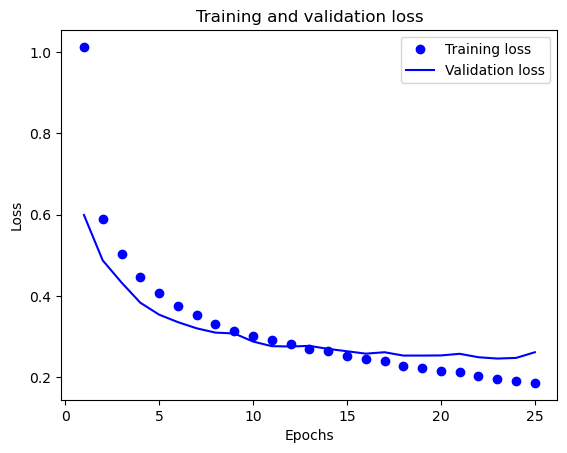

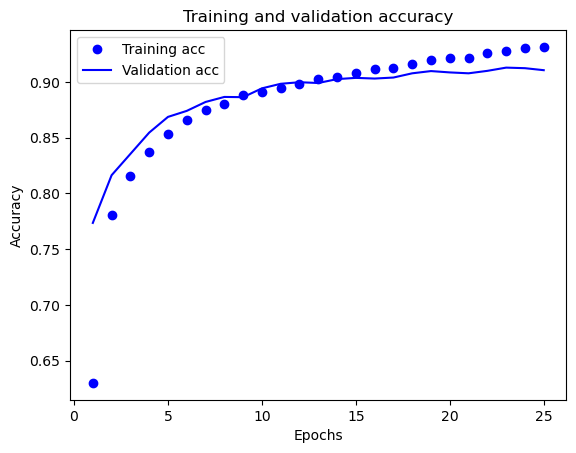

In [9]:
clear_session()

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=num_features),  # Згортковий шар з 64 фільтрами
    layers.MaxPooling2D((2, 2)),  # Пулінговий шар

    layers.Conv2D(64, (3, 3), activation='relu'),  # Згортковий шар з 64 фільтрами
    layers.MaxPooling2D((2, 2)),  # Пулінговий шар

    layers.Conv2D(64, (3, 3), activation='relu'),  # Згортковий шар з 64 фільтрами

    layers.Flatten(),  # Вирівнювання вихідних даних
    layers.Dense(256, activation='sigmoid'),  # Повнозв'язний шар з 256 нейронами
    layers.Dropout(0.75),
    layers.Dense(num_classes, activation='softmax')  # Вихідний шар з 10 нейронами (класи)
])


optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train,
    y_train,
    epochs=25,
    batch_size=256,
    validation_data=(x_test, y_test),
    verbose = 1
)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('Точність на тренувальних даних:', train_acc)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точність на тестових даних:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

**Висновок**

Як бачимо, додавання згорткових та пулінг шарів дозволило нам досягнути гарного результату у порівнянні з моделлю з попереднього ДЗ - досягти точності більш ніж 91% на тестових даних всього лише за 25 епох навчання, а не за 1000. І найголовніше - уникнути перенавчання.


Завантажимо датасет fashion mnist, перетворимо зображення з одноканальних у триканальні, зробимо upscale та нормалізуємо дані:

In [11]:
# Завантажуємо датасет
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Перетворюємо зображення з одноканальних у триканальні
x_train = np.reshape(x_train, (len(x_train), 784))
x_train = np.dstack([x_train] * 3)
x_train = np.reshape(x_train, (len(x_train), 28, 28, 3))

x_test = np.reshape(x_test, (len(x_test), 784))
x_test = np.dstack([x_test] * 3)
x_test = np.reshape(x_test, (len(x_test), 28, 28, 3))

# Upscale зображень
x_train = np.asarray([img_to_array(array_to_img(im, scale=False).resize((32, 32))) for im in x_train])
x_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((32, 32))) for im in x_test])

# Перетворюємо цілочисельні пікселі на тип float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Нормалізуємо значення пікселів
x_train, x_test = x_train / 255., x_test / 255.

А тепер зробимо все теж саме, що й у першій частині завдання, але замість того, щоб власноруч визначати згорткові та пулінг шари, скористаємося відомою переднавченою моделлю VGG16:

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,586 (56.64 MB)

 Trainable params: 133,898 (523.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 89s 378ms/step - accuracy: 0.4053 - loss: 1.7531 - val_accuracy: 0.7620 - val_loss: 0.7293
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 88s 375ms/step - accuracy: 0.7133 - loss: 0.8167 - val_accuracy: 0.7856 - val_loss: 0.6114
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 89s 377ms/step - accuracy: 0.7530 - loss: 0.6979 - val_accuracy: 0.7996 - val_loss: 0.5589
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 89s 378ms/step - accuracy: 0.7702 - loss: 0.6416 - val_accuracy: 0.8092 - val_loss: 0.5248
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 89s 377ms/step - accuracy: 0.7851 - loss: 0.6012 - val_accuracy: 0.8157 - val_loss: 0.5042
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 88s 376ms/step - accuracy: 0.7926 - loss: 0.5749 - val_accuracy: 0.8227 - val_loss: 0.4899
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 89s 377ms/step - accuracy: 0.8043 - loss: 0.5486 - val_accuracy: 0.8258 - val_loss: 0.4753
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 88s 377ms/step - accuracy: 0.8010 - loss: 0

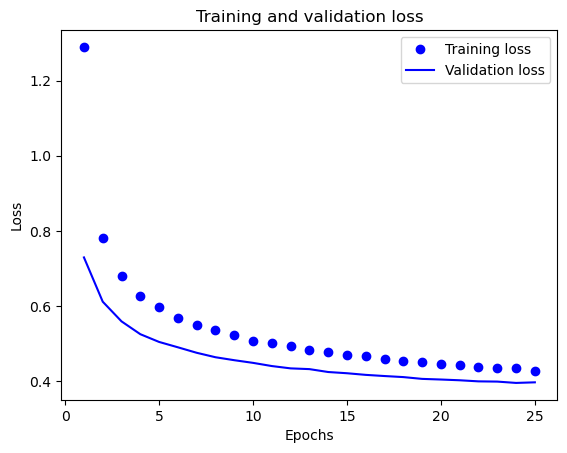

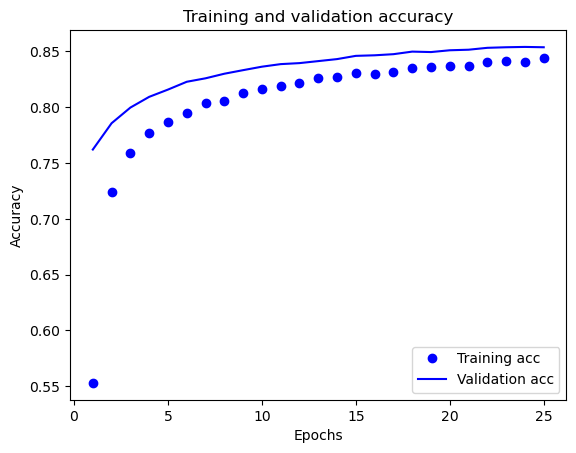

In [15]:
clear_session()

vgg16 = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
vgg16.trainable = False

model = models.Sequential([
    vgg16,

    layers.Flatten(),  # Вирівнювання вихідних даних
    layers.Dense(256, activation='sigmoid'),  # Повнозв'язний шар з 256 нейронами
    layers.Dropout(0.75),
    layers.Dense(num_classes, activation='softmax')  # Вихідний шар з 10 нейронами (класи)
])


optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train,
    y_train,
    epochs=25,
    batch_size=256,
    validation_data=(x_test, y_test),
    verbose = 1
)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('Точність на тренувальних даних:', train_acc)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точність на тестових даних:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Як видно з графіків, модель з VGG16 успішно навчається і за 25 епох не досягла максимуму, але збіжність бажано могла б бути швидшою, особливо враховуючи обчислювальну складність та повільність моделі. Спробуємо перенавчити останній згортковий шар VGG16:

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,586 (56.64 MB)

 Trainable params: 2,493,706 (9.51 MB)

 Non-trainable params: 12,354,880 (47.13 MB)

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 101s 427ms/step - accuracy: 0.6563 - loss: 1.0124 - val_accuracy: 0.8466 - val_loss: 0.4125
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 99s 422ms/step - accuracy: 0.8395 - loss: 0.4634 - val_accuracy: 0.8634 - val_loss: 0.3747
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 99s 423ms/step - accuracy: 0.8600 - loss: 0.3938 - val_accuracy: 0.8671 - val_loss: 0.3617
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 100s 424ms/step - accuracy: 0.8654 - loss: 0.3811 - val_accuracy: 0.8712 - val_loss: 0.3542
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 100s 425ms/step - accuracy: 0.8766 - loss: 0.3507 - val_accuracy: 0.8812 - val_loss: 0.3324
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 99s 422ms/step - accuracy: 0.8848 - loss: 0.3263 - val_accuracy: 0.8798 - val_loss: 0.3288
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 99s 423ms/step - accuracy: 0.8882 - loss: 0.3119 - val_accuracy: 0.8850 - val_loss: 0.3243
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 101s 432ms/step - accuracy: 0.8915 - los

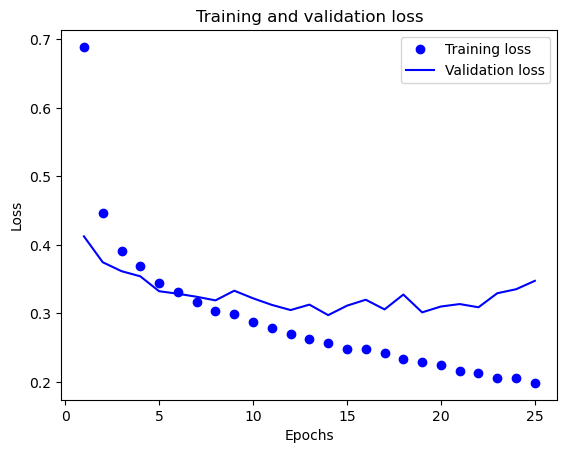

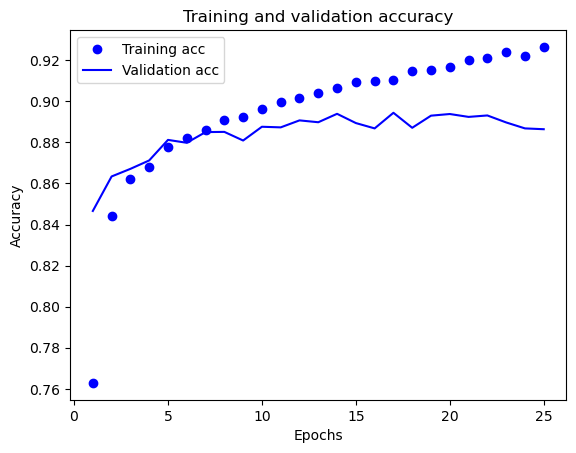

In [19]:
clear_session()

vgg16 = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
vgg16.trainable = True
set_trainable = False
for layer in vgg16.layers:
    if layer.name == "block5_conv3":
        layer.trainable = True
    else:
        layer.trainable = False
# for layer in vgg16.layers:
#     if layer.name == "block5_conv3":
#         set_trainable = True
#     if set_trainable:
#         layer.trainable = True
#     else:
#         layer.trainable = False

model = models.Sequential([
    vgg16,

    layers.Flatten(),  # Вирівнювання вихідних даних
    layers.Dense(256, activation='sigmoid'),  # Повнозв'язний шар з 256 нейронами
    layers.Dropout(0.75),
    layers.Dense(num_classes, activation='softmax')  # Вихідний шар з 10 нейронами (класи)
])


optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train,
    y_train,
    epochs=25,
    batch_size=256,
    validation_data=(x_test, y_test),
    verbose = 1
)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('Точність на тренувальних даних:', train_acc)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точність на тестових даних:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Результат не є вражаючим. Спробуємо перенавчити усі згорткові шари на останньому блоці VGG16:

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,586 (56.64 MB)

 Trainable params: 7,213,322 (27.52 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 195s 829ms/step - accuracy: 0.7049 - loss: 0.8963 - val_accuracy: 0.8788 - val_loss: 0.3530
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 195s 829ms/step - accuracy: 0.8827 - loss: 0.3586 - val_accuracy: 0.8789 - val_loss: 0.3296
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 194s 827ms/step - accuracy: 0.8915 - loss: 0.3210 - val_accuracy: 0.8924 - val_loss: 0.3173
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 197s 840ms/step - accuracy: 0.9005 - loss: 0.2961 - val_accuracy: 0.9023 - val_loss: 0.2896
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 194s 824ms/step - accuracy: 0.9057 - loss: 0.2837 - val_accuracy: 0.9034 - val_loss: 0.2902
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 196s 833ms/step - accuracy: 0.9115 - loss: 0.2648 - val_accuracy: 0.8970 - val_loss: 0.3100
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 198s 843ms/step - accuracy: 0.9115 - loss: 0.2617 - val_accuracy: 0.9016 - val_loss: 0.3141
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 199s 846ms/step - accuracy: 0.9137 -

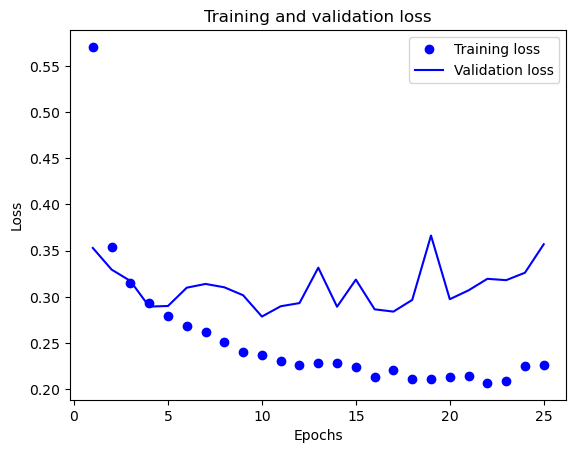

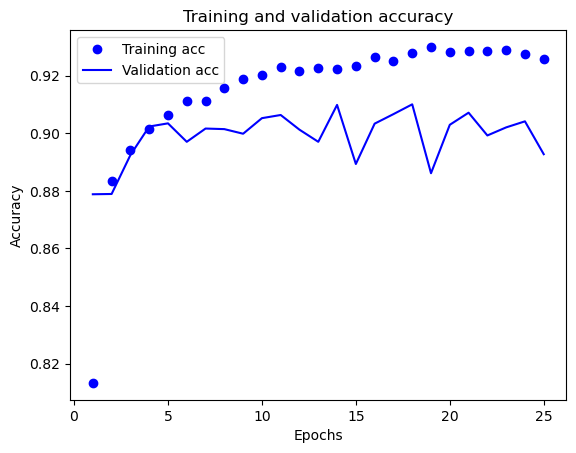

In [22]:
clear_session()

vgg16 = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
vgg16.trainable = True
set_trainable = False
for layer in vgg16.layers:
    if layer.name.startswith("block5_"):
        layer.trainable = True
    else:
        layer.trainable = False
# for layer in vgg16.layers:
#     if layer.name == "block5_conv1":
#         set_trainable = True
#     if set_trainable:
#         layer.trainable = True
#     else:
#         layer.trainable = False

model = models.Sequential([
    vgg16,

    layers.Flatten(),  # Вирівнювання вихідних даних
    layers.Dense(256, activation='sigmoid'),  # Повнозв'язний шар з 256 нейронами
    layers.Dropout(0.75),
    layers.Dense(num_classes, activation='softmax')  # Вихідний шар з 10 нейронами (класи)
])


optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train,
    y_train,
    epochs=25,
    batch_size=256,
    validation_data=(x_test, y_test),
    verbose = 1
)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('Точність на тренувальних даних:', train_acc)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точність на тестових даних:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

І знову результат не вражаючий. Але спробуємо тепер прибрати частину наших кастомних повнозв'язних шарів:

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,719,818 (56.15 MB)

 Trainable params: 7,084,554 (27.03 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 199s 846ms/step - accuracy: 0.7406 - loss: 0.7286 - val_accuracy: 0.8620 - val_loss: 0.3723
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 194s 824ms/step - accuracy: 0.8875 - loss: 0.3053 - val_accuracy: 0.8961 - val_loss: 0.3010
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 200s 850ms/step - accuracy: 0.9016 - loss: 0.2651 - val_accuracy: 0.8953 - val_loss: 0.2882
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 205s 872ms/step - accuracy: 0.9109 - loss: 0.2375 - val_accuracy: 0.9001 - val_loss: 0.2854
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 204s 869ms/step - accuracy: 0.9202 - loss: 0.2142 - val_accuracy: 0.8959 - val_loss: 0.2999
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 203s 864ms/step - accuracy: 0.9271 - loss: 0.1974 - val_accuracy: 0.9009 - val_loss: 0.2741
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 208s 884ms/step - accuracy: 0.9258 - loss: 0.1950 - val_accuracy: 0.9043 - val_loss: 0.2914
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 206s 876ms/step - accuracy: 0.9323 -

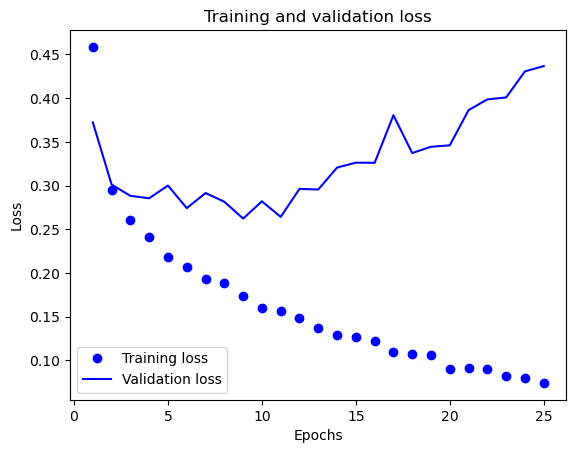

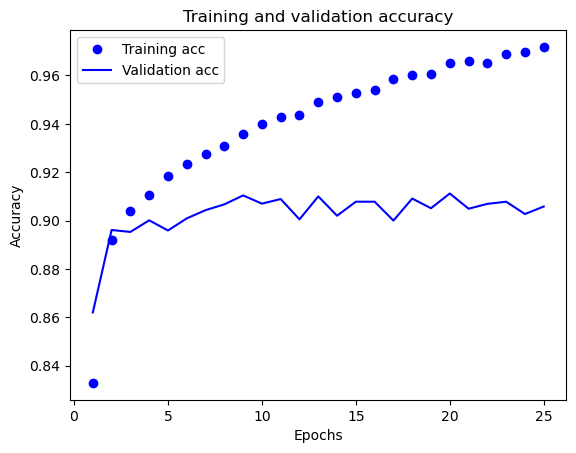

In [25]:
clear_session()

vgg16 = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
vgg16.trainable = True
set_trainable = False
for layer in vgg16.layers:
    if layer.name.startswith("block5_"):
        layer.trainable = True
    else:
        layer.trainable = False
# for layer in vgg16.layers:
#     if layer.name == "block5_conv1":
#         set_trainable = True
#     if set_trainable:
#         layer.trainable = True
#     else:
#         layer.trainable = False

model = models.Sequential([
    vgg16,

    layers.Flatten(),  # Вирівнювання вихідних даних
    layers.Dense(num_classes, activation='softmax')  # Вихідний шар з 10 нейронами (класи)
])


optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train,
    y_train,
    epochs=25,
    batch_size=256,
    validation_data=(x_test, y_test),
    verbose = 1
)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('Точність на тренувальних даних:', train_acc)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точність на тестових даних:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

**Висновок**

І нарешті тепер ми досягли всього за 10-11 епох результату ~91% точності на тестових даних, уникнувши перенавчання. Для порівняння - у попередньому ДЗ ми хоч і досягли такої точності (за 1000 епох), але перенавчання уникнути не вдалося.